현실적인 예시를 위해 다음과 같은 데이터셋을 사용한다.

In [6]:
student = pd.read_csv('./data/StudentsPerformance.csv')
student.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
270,male,group C,bachelor's degree,standard,none,69,63,61
719,male,group E,associate's degree,free/reduced,completed,91,73,80
276,female,group C,some high school,standard,completed,85,92,93
13,male,group A,some college,standard,completed,78,72,70
595,female,group C,bachelor's degree,standard,completed,56,79,72


## Ⅰ. Basic Bar Plot

- `bar()` : 기본적인 bar plot
- `barh()` : horizontal bar plot

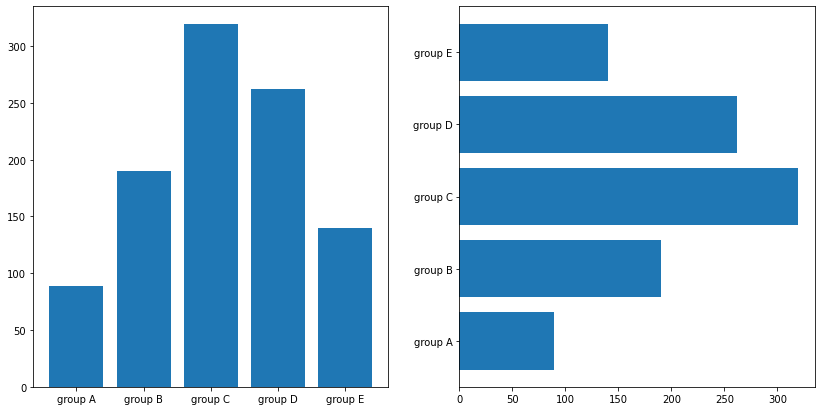

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

group_cnt = student['race/ethnicity'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

x, y = group_cnt.index, group_cnt

axes[0].bar(x, y)
axes[1].barh(x, y)

plt.show()

다음과 같은 파라미터를 조절하며 그래프를 변경할 수 있다.
  1. `width` : bar의 너비
  2. `color` : bar의 색
  3. `edgecolor`, `linewidth` : bar의 테두리선 색, 굵기
  4. `ax.margins` : 그래프의 여백
  5. `ax.splines` : 그래프의 border on/off
  6. `ax.grid` 와 `zorder` : grid 표시
  7. `ax.text` : 값 표기

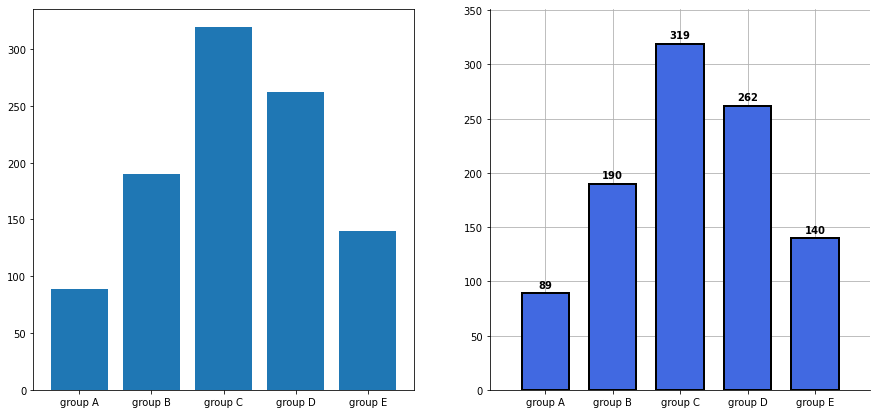

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.bar(group_cnt.index, group_cnt)
ax2.bar(group_cnt.index, group_cnt,
        width=0.7,
        edgecolor='black',
        linewidth=2,
        color='royalblue',
        zorder=2)

ax2.margins(0.1, 0.1)
ax2.grid()

for s in ['top', 'right']:
    ax2.spines[s].set_visible(False)

for idx, value in zip(group_cnt.index, group_cnt):
    ax2.text(idx, value+5, s=value,
                 ha='center', 
                 fontweight='bold')
        
plt.show()

## Ⅱ. Multiple Bar Plot

두개의 bar plot을 표시한다. 비교를 위해 두 그래프의 축을 맞춰줘야 한다. 주로 다음과 같은 방법을 쓴다.
1. subplot을 만들 때, `sharey` 파라미터를 사용하는 방법
2. 반복문을 사용하여 y축 범위를 개별적으로 조정하는 방법

In [42]:
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
display(group)

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
Name: race/ethnicity, dtype: int64

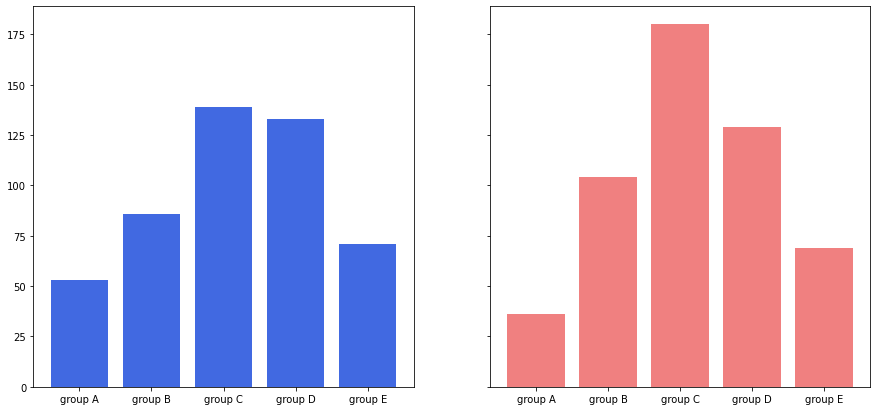

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='lightcoral')
plt.show()

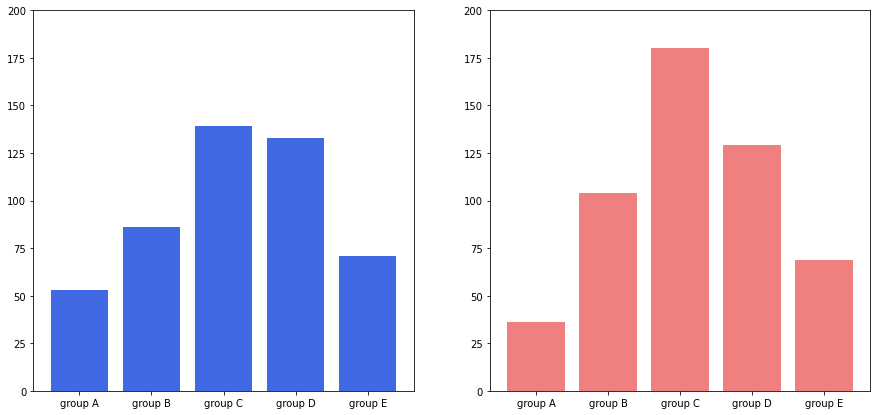

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='lightcoral')

for ax in axes:
    ax.set_ylim(0, 200)
    
plt.show()

## Ⅲ. Stacked Bar Plot

다수의 bar plot 쌓인 형태이며 `bottom` 혹은 `left` parameter를 이용해 생성할 수 있다.

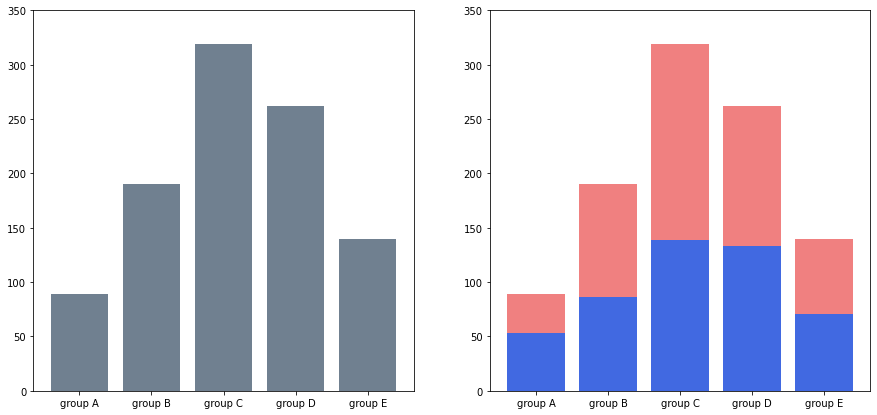

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

group_cnt = student['race/ethnicity'].value_counts().sort_index()
axes[0].bar(group_cnt.index, group_cnt, color='slategrey')
axes[1].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], bottom=group['male'], color='lightcoral')

for ax in axes:
    ax.set_ylim(0, 350)
    
plt.show()

## Ⅳ.  Percentage Stacked Bar Plot

Stacked bar plot을 응용하여 만들 수 있다.

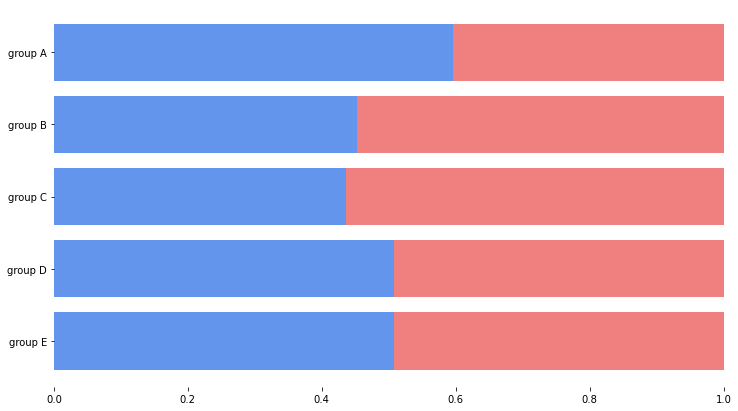

In [25]:
fig, ax = plt.subplots(figsize=(12, 7))

group = group.sort_index(ascending=False)
total = group['male'] + group['female']

ax.barh(group['male'].index, group['male']/total, color='royalblue')

ax.barh(group['female'].index, group['female']/total, 
        left=group['male']/total, color='lightcoral')

ax.set_xlim(0, 1)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

## Ⅴ. Overlapped Bar Plot

투명도 `alpha`를 이용해 bar plot을 겹쳐 표현하는 방식이다.

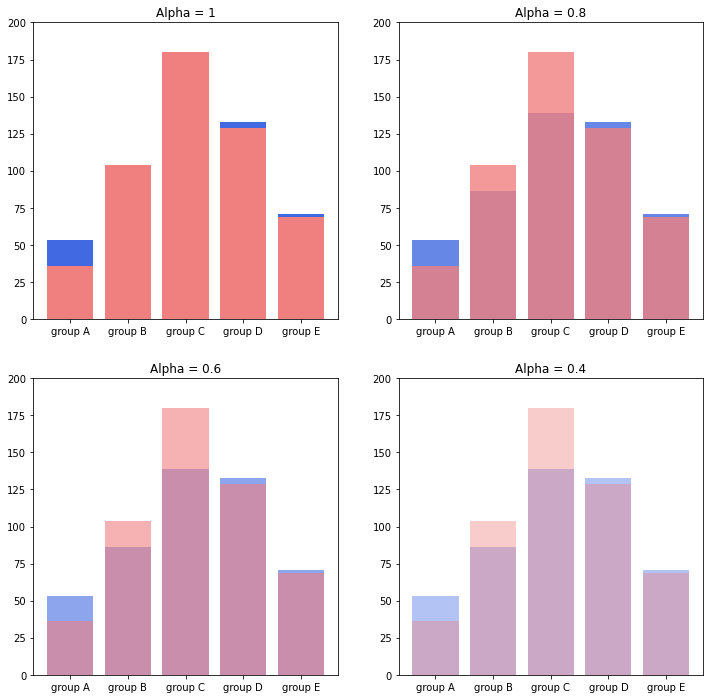

In [54]:
group = group.sort_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, alpha in enumerate([1, 0.8, 0.6, 0.4]):
    axes[idx].bar(group['male'].index, group['male'], 
                  color='royalblue', alpha=alpha)
    axes[idx].bar(group['female'].index, group['female'],
                  color='lightcoral', alpha=alpha)
    axes[idx].set_title(f'Alpha = {alpha}')
    
for ax in axes:
    ax.set_ylim(0, 200)

plt.show()

## Ⅵ. Grouped Bar Plot

x축, `width`, `xticks`, `xticklabels` 을 조정해 구현할 수 있다.  
비교적 까다롭기 때문에 Seaborn 라이브러리를 사용하는 것이 일반적이다.

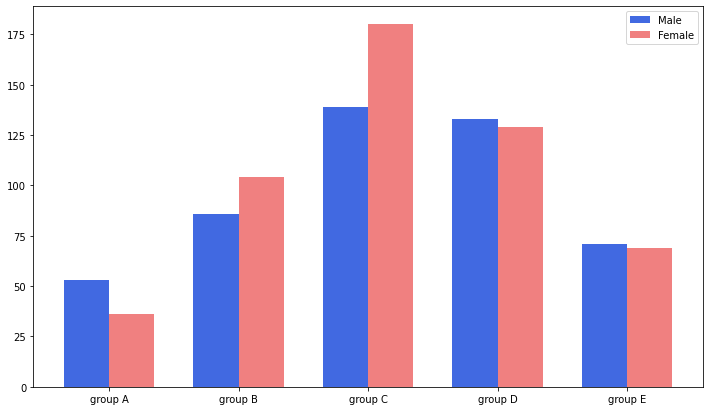

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

idx = np.arange(len(group['male'].index))
width=0.35

ax.bar(idx-width/2, group['male'], 
       color='royalblue', width=width, label='Male')

ax.bar(idx+width/2, group['female'], 
       color='lightcoral', width=width, label='Female')

ax.set_xticks(idx)
ax.set_xticklabels(group['male'].index)
ax.legend()    
plt.show()

## Ⅶ. Errorbar Plot

`yerr` 과 `capsize`를 이용하여 오차막대를 표시할 수 있다.

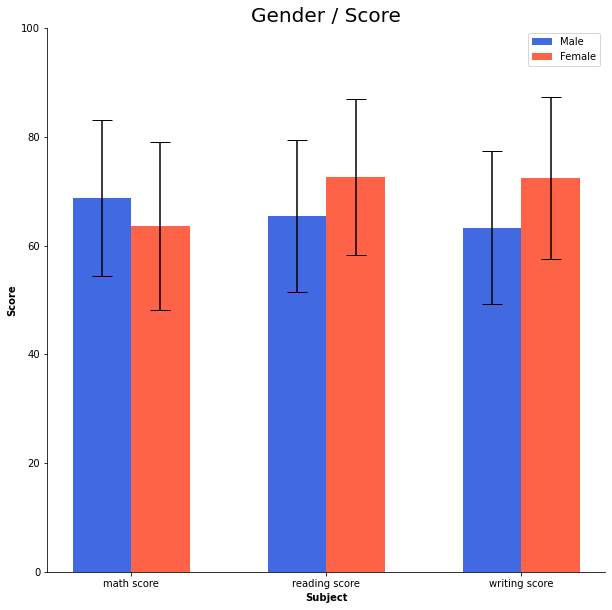

In [97]:
score = student.groupby('gender').mean().T
score_var = student.groupby('gender').std().T

fig, ax = plt.subplots(figsize=(10, 10))

idx = np.arange(len(score.index))
width=0.3

ax.bar(idx-width/2, score['male'], label='Male',
       color='royalblue', width=width,
       yerr=score_var['male'], capsize=10)

ax.bar(idx+width/2, score['female'], label='Female',
       color='tomato', width=width,
       yerr=score_var['female'], capsize=10)

ax.set_ylim(0, 100)

ax.set_xticks(idx)
ax.set_xticklabels(score.index)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
ax.set_title('Gender / Score', fontsize=20)
ax.set_xlabel('Subject', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')

plt.show()